In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import os
try:
    from google.colab import files
except ImportError:
    files = None


Matplotlib is building the font cache; this may take a moment.


In [2]:
if not os.path.exists('healthcare_dataset.csv'):
    if files:
        print("Upload your 'healthcare_dataset.csv' file now 👇")
        uploaded = files.upload()
    else:
        raise FileNotFoundError("Please ensure 'healthcare_dataset.csv' exists in your working directory.")

df = pd.read_csv('healthcare_dataset.csv')
print('Shape:', df.shape)
display(df.head())
print("\nInfo:")
print(df.info())
print("\nColumns and nunique values:")
print(df.nunique())


Shape: (55500, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usa

In [3]:
df_prep = df.copy()
target = 'Gender'
print('Using target column:', target)

# Drop ID-like columns
id_like_cols = [c for c in df_prep.columns if df_prep[c].nunique() == len(df_prep)]
if id_like_cols:
    print('Dropping ID-like columns:', id_like_cols)
    df_prep.drop(columns=id_like_cols, inplace=True)

# Separate features and target
X = df_prep.drop(columns=[target])
y = df_prep[target]

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
if cat_cols:
    print('Encoding categorical columns using LabelEncoder:', cat_cols)
    le = LabelEncoder()
    for col in cat_cols:
        X[col] = le.fit_transform(X[col].astype(str))

# Encode target if needed
if y.dtype == 'object' or str(y.dtype).startswith('category'):
    y = y.astype('category').cat.codes

print('Final feature matrix shape:', X.shape)


Using target column: Gender
Encoding categorical columns using LabelEncoder: ['Name', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']
Final feature matrix shape: (55500, 14)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if len(np.unique(y)) > 1 else None)

print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


Train shape: (44400, 14) Test shape: (11100, 14)


In [5]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {acc:.4f}\n')
print('Classification report:\n', report)
print('Confusion matrix:\n', cm)


Accuracy: 0.5782

Classification report:
               precision    recall  f1-score   support

           0       0.57      0.61      0.59      5545
           1       0.58      0.55      0.57      5555

    accuracy                           0.58     11100
   macro avg       0.58      0.58      0.58     11100
weighted avg       0.58      0.58      0.58     11100

Confusion matrix:
 [[3365 2180]
 [2502 3053]]


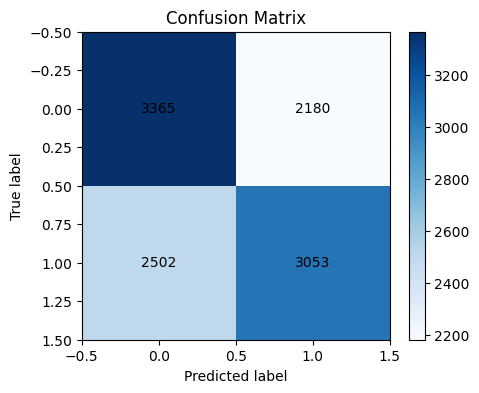

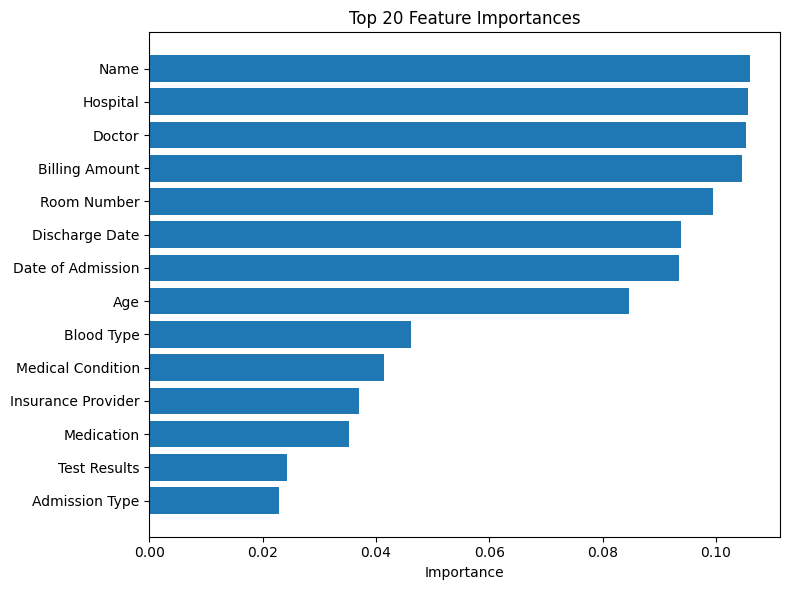

In [6]:
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, str(z), ha='center', va='center')
plt.show()

# Feature importances
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False).head(20)

plt.figure(figsize=(8,6))
plt.barh(feat_imp.index[::-1], feat_imp.values[::-1])
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()
